### Read dataset

Save the file path and the file name

In [ ]:
import os

fakevideoFilename=[]
fakefilename=[] # video file path

basepath='./Dataset/' # you need to edit the path
with os.scandir(basepath) as entries:
    for entry in entries:
        # print('entry: ', entry)
        if entry.is_dir():
            nextpath=basepath+entry.name+'/' 
            if(entry.name!=".ipynb_checkpoints"):  #and entry.name!=".ipynb_checkpoints"
                with os.scandir(nextpath) as dirs:
                    for directory in dirs:
                        # print('directory: ', directory)
                        if directory.is_dir() and directory.name!=".ipynb_checkpoints": #and directory.name!=".ipynb_checkpoints"
                            finalpath=nextpath+directory.name+'/'
                            with os.scandir(finalpath) as filenames:
                                for filename in filenames:
                                    # print('filename: ', filename)
                                    if filename.is_dir() and filename.name!=".ipynb_checkpoints":
                                        ffinalpath=finalpath+filename.name+'/'
                                        with os.scandir(ffinalpath) as ffilenames:
                                            for ffilename in ffilenames:
                                                if ffilename.is_file() and ffilename.name!="croppedFaces.npz":
                                                    real_final_path=ffinalpath+ffilename.name                                                                       
                                                    fakefilename.append(filename.name+"_"+entry.name+"_"+directory.name+".xlsx")
                                                    fakevideoFilename.append(real_final_path)

### Save HR feature in excel file

Define functions that make excell files for HR features

In [ ]:
from openpyxl import Workbook

def make_excel(filepath,filename,bpmES,method,timestamp):
    if timestamp==1: 
        ch=1
    elif timestamp==0.1: 
        ch=10
    else: 
        ch=5
        
    wb=Workbook()

    for sheet in wb.sheetnames:
        wb.remove(wb[sheet])

    ws=wb.create_sheet(filename)
    position = 0
    column=1

    for bpm in bpmES:
        row=1
        ws.cell(row=row,column=column, value=position)
        row+=1
        # a: Standard deviation of all HRs
        var_a = np.std(bpm)

        # b: The square root of the mean of the sum of the squares of differences between adjacent HRs
        b_list = []
        for i in range(0, len(bpm[0])-1):
            b_list.append(abs(bpm[0][i] - bpm[0][i+1])** 2)
        var_b = np.mean(b_list)
        var_b = np.sqrt(var_b)
              
        # c. Standard deviation of differences between adjacent NN intervals
        c_list = []
        for i in range(0, len(bpm[0])-1):
            c_list.append(abs(bpm[0][i] - bpm[0][i+1]))
        var_c=np.std(c_list)          
        
        position = position + 1

        #csv write
        ws.cell(row=row,column=column, value=var_a)
        row+=1
        ws.cell(row=row,column=column, value=var_b)
        row+=1
        ws.cell(row=row,column=column, value=var_c)
        column+=1


    # save
    wb.save(filepath+str(timestamp)+'_'+method+'_'+filename)
    wb.close()

    print('-> '+filename+'save done!')

In [ ]:
from openpyxl import Workbook

def make_avg_excel(filepath,filename,bpmEs,method, timestamp):
    if timestamp==1: 
        ch=1
    elif timestamp==0.1: 
        ch=10
    else: 
        ch=5
        
    wb=Workbook()

    for sheet in wb.sheetnames:
        wb.remove(wb[sheet])

    ws=wb.create_sheet(filename)
    position = 0
    column=1

    #avgbpm
    avgbpm = [0 for i in range(len(bpmES[0][0]))]
    a = 0
    for bpm in bpmES[:9]:
        a = a + 1
        for i in range(len(bpm[0])):
            avgbpm[i] = avgbpm[i] + bpm[0][i]
    for i in range(len(bpm[0])):
        avgbpm[i] = avgbpm[i]/9

    row=1
    ws.cell(row=row,column=column, value=position)
    count = 0
    row+=1
    # a: Standard deviation of all BPMs
    var_a = np.std(avgbpm)

    # b: The square root of the mean of the sum of the squares of differences between adjacent BPMs
    b_list = []
    for i in range(0, len(avgbpm)-1):
        b_list.append(abs(avgbpm[i] - avgbpm[i+1])** 2)
    var_b = np.mean(b_list)
    var_b = np.sqrt(var_b)
        
        
    # c. Standard deviation of differences between adjacent NN intervals
    c_list = []
    for i in range(0, len(avgbpm)-1):
        c_list.append(abs(avgbpm[i] - avgbpm[i+1]))
    var_c=np.std(c_list)
        
    position = position + 1

    #csv write
    ws.cell(row=row,column=column, value=var_a)
    row+=1
    ws.cell(row=row,column=column, value=var_b)
    row+=1
    ws.cell(row=row,column=column, value=var_c)
    column+=1

    # save
    wb.save(filepath+str(timestamp)+'_'+method+'_'+'avg_'+filename)
    wb.close()

    print('-> '+filename+"_avg"+' save done!')

Define labels for face detection

In [ ]:
vid_area = {'./Dataset/real/ff/098/098.mp4':[[5 , 2 , 95 , 138]],
           './Dataset/real/ff/107/107.mp4':[[0 , 8 , 85 , 110]],
            './Dataset/real/ff/109/109.mp4':[[0 , 3 , 94 , 128]],
            './Dataset/real/ff/113/113.mp4':[[2 , 50 , 161 , 172]],
            './Dataset/real/ff/119/119.mp4':[[0, 2, 90, 127]],
            './Dataset/real/ff/122/122.mp4':[[0, 50, 275, 370]],
            './Dataset/real/ff/123/123.mp4':[[0, 17, 96, 110]],
            './Dataset/real/ff/134/134.mp4':[[2, 40, 160, 180]],
            './Dataset/real/ff/141/141.mp4':[[0, 3, 95, 128]],
            './Dataset/real/ff/144/144.mp4':[[8, 0, 280, 400]],
            './Dataset/real/ff/147/147.mp4':[[3, 13, 131, 170]],
            './Dataset/real/ff/161/161.mp4':[[3, 13, 93, 121]],
            './Dataset/real/ff/168/168.mp4':[[3, 13, 84, 113]],
            './Dataset/real/ff/182/182.mp4':[[3, 3, 144, 203]],
            './Dataset/real/ff/189/189.mp4':[[0, 3, 100, 133]],
            './Dataset/real/ff/192/192.mp4':[[18, 3, 160, 244]],
            './Dataset/real/ff/194/194.mp4':[[0, 23, 102, 112]],
            './Dataset/real/ff/200/200.mp4':[[0, 13, 96, 111]],
            './Dataset/real/ff/222/222.mp4':[[2, 13, 98, 120]],
            './Dataset/real/ff/226/226.mp4':[[2, 0, 180, 253]],
            './Dataset/real/ff/235/235.mp4':[[0, 3, 104, 143]],
            './Dataset/real/ff/242/242.mp4':[[2, 10, 113, 175]],
            './Dataset/real/ff/278/278.mp4':[[1, 3, 68, 98]],
            './Dataset/real/ff/293/293.mp4':[[1, 7, 106, 141]],
            './Dataset/real/ff/296/296.mp4':[[1, 7, 106, 137]],
            './Dataset/real/ff/303/303.mp4':[[1, 8, 100, 135]],
            './Dataset/real/ff/306/306.mp4':[[1, 8, 78, 105]],
            './Dataset/real/ff/309/309.mp4':[[9, 10, 85, 121]],
            './Dataset/real/ff/316/316.mp4':[[0, 8, 95, 116]],
            './Dataset/real/ff/327/327.mp4':[[1, 2, 74, 97]],
            './Dataset/real/ff/329/329.mp4':[[1, 6, 84, 107]],
            './Dataset/real/ff/337/337.mp4':[[1, 7, 69, 89]],
            './Dataset/real/ff/349/349.mp4':[[9, 7, 87, 126]],
            './Dataset/real/ff/350/350.mp4':[[6, 7, 102, 138]],
            './Dataset/real/ff/358/358.mp4':[[0, 0, 115, 168]],
            './Dataset/real/ff/366/366.mp4':[[0, 10, 76, 97]],
            './Dataset/real/ff/369/369.mp4':[[0, 0, 98, 135]],
            './Dataset/real/ff/380/380.mp4':[[0, 0, 119, 165]],
            './Dataset/real/ff/382/382.mp4':[[0, 0, 63, 88]],
            './Dataset/real/ff/398/398.mp4':[[0, 11, 119, 152]],
            './Dataset/real/ff/399/399.mp4':[[0, 15, 250, 355]],
            './Dataset/real/ff/408/408.mp4':[[0, 15, 99, 120]],
            './Dataset/real/ff/409/409.mp4':[[0, 2, 59, 85]],
            './Dataset/real/ff/418/418.mp4':[[0, 20, 389, 565]],
            './Dataset/real/ff/424/424.mp4':[[0, 0, 97, 137]],
            './Dataset/real/ff/436/436.mp4':[[0, 0, 117, 167]],
            './Dataset/real/ff/449/449.mp4':[[15, 20, 188, 241]],
            './Dataset/real/ff/451/451.mp4':[[0, 0, 178, 251]],
            './Dataset/real/ff/457/457.mp4':[[0, 0, 109, 168]],
            './Dataset/real/ff/473/473.mp4':[[0, 0, 80, 108]],
            './Dataset/real/ff/488/488.mp4':[[0, 15, 250, 266]],
            './Dataset/real/ff/491/491.mp4':[[36, 4, 110, 212]],
            './Dataset/real/ff/558/558.mp4':[[0, 4, 170, 239]],
            './Dataset/real/ff/618/618.mp4':[[0, 4, 185, 249]],
            './Dataset/real/ff/619/619.mp4':[[0, 4, 185, 249]],
            './Dataset/real/ff/620/620.mp4':[[0, 4, 215, 281]],
            './Dataset/real/ff/629/629.mp4':[[0, 4, 155, 221]],
            './Dataset/real/ff/699/699.mp4':[[0, 4, 91, 121]],
            './Dataset/real/ff/705/705.mp4':[[0, 15, 122, 153]],
            './Dataset/real/ff/707/707.mp4':[[0, 15, 112, 138]],
            './Dataset/real/ff/719/719.mp4':[[0, 7, 102, 137]],
            './Dataset/real/ff/761/761.mp4':[[0, 7, 82, 106]],
            './Dataset/fake/Deepfakes/107_109/107_109.mp4':[[1 , 10 , 82 , 110]],
            './Dataset/fake/Deepfakes/109_107/109_107.mp4':[[1 , 8 , 93 , 120]],
            './Dataset/fake/Deepfakes/113_983/113_983.mp4':[[1 , 12 , 150 , 200]],
            './Dataset/fake/Deepfakes/119_123/119_123.mp4':[[1 , 6 , 90 , 122]],
            './Dataset/fake/Deepfakes/122_144/122_144.mp4':[[1 , 20 , 270 , 380]],
            './Dataset/fake/Deepfakes/123_119/123_119.mp4':[[1 , 5 , 95 , 125]],
            './Dataset/fake/Deepfakes/134_192/134_192.mp4':[[1 , 12 , 155 , 190]],
            './Dataset/fake/Deepfakes/141_161/141_161.mp4':[[1 , 6 , 95 , 130]],
            './Dataset/fake/Deepfakes/144_122/144_122.mp4':[[1 , 6 , 260 , 355]],
            './Dataset/fake/Deepfakes/147_055/147_055.mp4':[[1 , 8 , 130 , 175]],
            './Dataset/fake/Deepfakes/161_141/161_141.mp4':[[1 , 8 , 97 , 125]],
            './Dataset/fake/Deepfakes/168_222/168_222.mp4':[[5 , 12 , 89 , 115]],
            './Dataset/fake/Deepfakes/182_242/182_242.mp4':[[10 , 6 , 125 , 200]],
            './Dataset/fake/Deepfakes/189_200/189_200.mp4':[[1 , 4 , 95 , 127]],
            './Dataset/fake/Deepfakes/192_134/192_134.mp4':[[13 , 11 , 170 , 240]],
            './Dataset/fake/Deepfakes/194_235/194_235.mp4':[[2 , 20 , 95 , 110]],
            './Dataset/fake/Deepfakes/200_189/200_189.mp4':[[2 , 15 , 93 , 110]],
            './Dataset/fake/FaceShifter/222_168/222_168.mp4':[[5 , 10 , 95 , 122]],
            './Dataset/fake/FaceShifter/226_491/226_491.mp4':[[2 , 3 , 185 , 252]],
            './Dataset/fake/FaceShifter/235_194/235_194.mp4':[[2 , 4 , 95 , 135]],
            './Dataset/fake/FaceShifter/242_182/242_182.mp4':[[4 , 10 , 110 , 175]],
            './Dataset/fake/FaceShifter/278_306/278_306.mp4':[[2 , 4 , 67 , 95]],
            './Dataset/fake/FaceShifter/293_296/293_296.mp4':[[2 , 3 , 106 , 142]],
            './Dataset/fake/Face2Face/296_293/296_293.mp4':[[2 , 6 , 102 , 143]],
            './Dataset/fake/Face2Face/303_309/303_309.mp4':[[2 , 10 , 95 , 135]],
            './Dataset/fake/Face2Face/306_278/306_278.mp4':[[2 , 10 , 72 , 97]],
            './Dataset/fake/Face2Face/309_303/309_303.mp4':[[4 , 12 , 90 , 125]],
            './Dataset/fake/Face2Face/316_369/316_369.mp4':[[2 , 6 , 92 , 122]],
            './Dataset/fake/Face2Face/327_329/327_329.mp4':[[2 , 6 , 72 , 95]],
            './Dataset/fake/Face2Face/329_327/329_327.mp4':[[2 , 8 , 83 , 107]],
            './Dataset/fake/Face2Face/337_522/337_522.mp4':[[1 , 6 , 68 , 87]],
            './Dataset/fake/Face2Face/349_350/349_350.mp4':[[10 , 7 , 90 , 125]],
            './Dataset/fake/Face2Face/350_349/350_349.mp4':[[2 , 8 , 105 , 139]],
            './Dataset/fake/Face2Face/358_380/358_380.mp4':[[2 , 3 , 111 , 169]],
            './Dataset/fake/Face2Face/366_473/366_473.mp4':[[2 , 5 , 73 , 94]],
            './Dataset/fake/Face2Face/369_316/369_316.mp4':[[2 , 5 , 97 , 129]],
            './Dataset/fake/Face2Face/380_358/380_358.mp4':[[3 , 5 , 115 , 155]],
            './Dataset/fake/Face2Face/382_409/382_409.mp4':[[3 , 2 , 57 , 85]],
            './Dataset/fake/Face2Face/398_457/398_457.mp4':[[12 , 8 , 102 , 150]],
            './Dataset/fake/Face2Face/399_488/399_488.mp4':[[9 , 6 , 235 , 345]],
            './Dataset/fake/Face2Face/408_424/408_424.mp4':[[2 , 8 , 96 , 120]],
            './Dataset/fake/FaceShifter/409_382/409_382.mp4':[[2 , 10 , 58 , 81]],
            './Dataset/fake/FaceShifter/418_507/418_507.mp4':[[2 , 25 , 365 , 527]],
            './Dataset/fake/FaceShifter/424_408/424_408.mp4':[[2 , 3 , 99 , 145]],
            './Dataset/fake/FaceShifter/436_526/436_526.mp4':[[2 , 3 , 120 , 159]],
            './Dataset/fake/FaceShifter/449_451/449_451.mp4':[[7 , 40 , 182 , 210]],
            './Dataset/fake/FaceShifter/451_449/451_449.mp4':[[5 , 3 , 180 , 250]],
            './Dataset/fake/FaceShifter/457_398/457_398.mp4':[[5 , 3 , 107 , 160]],
            './Dataset/fake/FaceShifter/473_366/473_366.mp4':[[2 , 3 , 75 , 105]],
            './Dataset/fake/FaceShifter/488_399/488_399.mp4':[[2 , 11 , 210 , 280]],
            './Dataset/fake/FaceShifter/491_226/491_226.mp4':[[30 , 3 , 112 , 200]],
            './Dataset/fake/FaceShifter/507_418/507_418.mp4':[[2 , 4 , 523 , 740]],
            './Dataset/fake/FaceShifter/522_337/522_337.mp4':[[1 , 4 , 56 , 82]],
            './Dataset/fake/FaceShifter/526_436/526_436.mp4':[[1 , 6 , 136 , 190]],
            './Dataset/fake/FaceShifter/536_540/536_540.mp4':[[1 , 12 , 175 , 242]],
            './Dataset/fake/FaceShifter/540_536/540_536.mp4':[[1 , 19 , 160 , 230]],
            './Dataset/fake/FaceShifter/558_583/558_583.mp4':[[1 , 19 , 160 , 220]],
            './Dataset/fake/FaceShifter/583_558/583_558.mp4':[[1 , 25 , 160 , 210]],
            './Dataset/fake/FaceShifter/595_597/595_597.mp4':[[1 , 8 , 104 , 140]],
            './Dataset/fake/FaceShifter/597_595/597_595.mp4':[[3 , 8 , 104 , 140]],
            './Dataset/fake/FaceShifter/618_629/618_629.mp4':[[3 , 12 , 175 , 225]],
            './Dataset/fake/FaceShifter/619_620/619_620.mp4':[[3 , 4 , 185 , 255]],
            './Dataset/real/ff/001/001.mp4':[[3 , 15 , 140 , 169]],
            './Dataset/real/ff/055/055.mp4':[[15 , 6 , 125 , 185]],
            './Dataset/real/ff/065/065.mp4':[[2 , 6 , 200 , 270]],
            './Dataset/real/ff/074/074.mp4':[[10 , 10 , 209 , 289]],
            './Dataset/real/ff/089/089.mp4':[[2 , 15 , 196 , 260]],
            './Dataset/real/ff/092/092.mp4':[[2 , 13 , 90 , 108]],
            './Dataset/fake/FaceSwap/872_873/872_873.mp4':[[0 , 0 , 115 , 157]],
            './Dataset/fake/FaceSwap/873_872/873_872.mp4':[[0 , 0 , 120 , 170]],
            './Dataset/fake/FaceSwap/875_979/875_979.mp4':[[0 , 0 , 180 , 265]],
            './Dataset/fake/FaceSwap/897_969/897_969.mp4':[[0 , 10 , 58 , 70]],
            './Dataset/fake/FaceSwap/899_914/899_914.mp4':[[0 , 10 , 120 , 140]],
            './Dataset/fake/FaceSwap/903_792/903_792.mp4':[[5 , 10 , 140 , 185]],
            './Dataset/fake/FaceSwap/914_899/914_899.mp4':[[0 , 10 , 125 , 170]],
            './Dataset/fake/FaceSwap/917_924/917_924.mp4':[[5 , 5 , 95 , 130]],
            './Dataset/fake/FaceSwap/924_917/924_917.mp4':[[0 , 5 , 97 , 132]],
            './Dataset/fake/FaceSwap/956_958/956_958.mp4':[[0 , 0 , 87 , 130]],
            './Dataset/fake/FaceSwap/958_956/958_956.mp4':[[0 , 0 , 93 , 123]],
            './Dataset/fake/FaceSwap/967_984/967_984.mp4':[[0 , 0 , 185 , 250]],
            './Dataset/fake/FaceSwap/969_897/969_897.mp4':[[0 , 0 , 57 , 80]],
            './Dataset/fake/FaceSwap/979_875/979_875.mp4':[[0 , 10 , 173 , 255]],
            './Dataset/fake/FaceSwap/983_113/983_113.mp4':[[0 , 10 , 125 , 165]],
            './Dataset/fake/FaceSwap/984_967/984_967.mp4':[[5 , 10 , 185 , 245]],
            './Dataset/fake/NeuralTextures/001_870/001_870.mp4':[[0 , 10 , 133 , 167]],
            './Dataset/fake/NeuralTextures/055_147/055_147.mp4':[[3 , 0 , 133 , 189]],
            './Dataset/fake/NeuralTextures/065_089/065_089.mp4':[[0 , 0 , 200 , 280]],
            './Dataset/fake/NeuralTextures/074_825/074_825.mp4':[[5 , 0 , 210 , 300]],
            './Dataset/fake/NeuralTextures/089_065/089_065.mp4':[[0 , 25 , 200 , 255]],
            './Dataset/fake/NeuralTextures/092_098/092_098.mp4':[[0 , 10 , 100 , 108]],
            './Dataset/fake/NeuralTextures/098_092/098_092.mp4':[[0 , 5 , 103 , 137]],
            './Dataset/fake/NeuralTextures/620_619/620_619.mp4':[[0 , 0 , 215 , 305]],
            './Dataset/fake/NeuralTextures/629_618/629_618.mp4':[[0 , 0 , 155 , 230]],
            './Dataset/fake/NeuralTextures/705_707/705_707.mp4':[[0 , 25 , 125 , 155]],
            './Dataset/fake/NeuralTextures/707_705/707_705.mp4':[[0 , 10 , 115 , 138]],
            './Dataset/fake/NeuralTextures/792_903/792_903.mp4':[[0 , 0 , 132 , 205]],
            './Dataset/fake/NeuralTextures/800_840/800_840.mp4':[[0 , 0 , 110 , 150]],
            './Dataset/fake/NeuralTextures/825_074/825_074.mp4':[[0 , 5 , 235 , 335]],
            './Dataset/fake/NeuralTextures/840_800/840_800.mp4':[[0 , 5 , 120 , 153]],
            './Dataset/fake/NeuralTextures/870_001/870_001.mp4':[[0 , 5 , 167 , 183]],
            './Dataset/real/ff/792/792.mp4':[[0 , 0 , 140 , 210]],
            './Dataset/real/ff/800/800.mp4':[[0 , 0 , 103 , 157]],
            './Dataset/real/ff/825/825.mp4':[[0 , 5 , 230 , 340]],
            './Dataset/real/ff/840/840.mp4':[[0 , 20 , 115 , 135]],
            './Dataset/real/ff/870/870.mp4':[[0 , 10 , 160 , 180]],
            './Dataset/real/ff/872/872.mp4':[[0 , 10 , 115 , 145]],
            './Dataset/real/ff/873/873.mp4':[[0 , 10 , 125 , 165]],
            './Dataset/real/ff/875/875.mp4':[[0 , 20 , 175 , 245]],
            './Dataset/real/ff/897/897.mp4':[[0 , 5 , 57 , 72]],
            './Dataset/real/ff/899/899.mp4':[[0 , 20 , 120 , 135]],
            './Dataset/real/ff/903/903.mp4':[[0 , 20 , 140 , 175]],
            './Dataset/real/ff/914/914.mp4':[[0 , 0 , 120 , 165]],
            './Dataset/real/ff/917/917.mp4':[[0 , 0 , 93 , 130]],
            './Dataset/real/ff/924/924.mp4':[[0 , 0 , 99 , 137]],
            './Dataset/real/ff/956/956.mp4':[[0 , 0 , 90 , 135]],
            './Dataset/real/ff/958/958.mp4':[[0 , 0 , 99 , 121]],
            './Dataset/real/ff/967/967.mp4':[[0 , 0 , 185 , 255]],
            './Dataset/real/ff/969/969.mp4':[[0 , 5 , 57 , 80]],
            './Dataset/real/ff/979/979.mp4':[[0 , 10 , 175 , 235]],
            './Dataset/real/ff/983/983.mp4':[[0 , 15 , 130 , 163]],
            './Dataset/real/ff/984/984.mp4':[[5 , 10 , 180 , 240]]
           }

Extract HR values

In [ ]:
label_dic = dict()
import tensorflow as tf
from pyVHR.signals.video import Video
from pyVHR.analysis.testsuite import TestSuite, TestResult

from pyVHR.methods.pos import POS
from pyVHR.methods.chrom import CHROM
from pyVHR.methods.green import GREEN
from pyVHR.methods.ica import ICA
from pyVHR.methods.lgi import LGI
from pyVHR.methods.pbv import PBV
from pyVHR.methods.pca import PCA
from pyVHR.methods.ssr import SSR
import numpy as np
for index_v in range(len(fakevideoFilename)):
    videoFilename =fakevideoFilename[index_v]
    video = Video(videoFilename)
    # -- extract faces
    try:
        video.getCroppedFaces(detector='mtcnn', extractor='skvideo')
        #video.printVideoInfo()
        #video.showVideo()
    except Exception as e:
        print(e)
        print("-----------------Error-------------------")
        print(videoFilename+" | face not Detected!")
        print("-----------------------------------------")
        notsaved.append(videoFilename)
    video.setMask(typeROI='rect', rectCoords=vid_area[fakevideoFilename[index_v]])
    video.showVideo()
    # -- define ROIs: free rectangular regions
    y=video.cropSize[0]
    x=video.cropSize[1]
    areas=[]
    left_x = vid_area[fakevideoFilename[index_v]][0][0] # x for left top
    left_y = vid_area[fakevideoFilename[index_v]][0][1] # y for left top
    x = vid_area[fakevideoFilename[index_v]][0][2] # difference of x
    y = vid_area[fakevideoFilename[index_v]][0][3] # difference of y
    w=x/3
    h=y/3
    rectCoords=[[left_x,left_y,w,h],[w+left_x,left_y,w,h],[2*w+left_x,left_y,w,h],[left_x,h+left_y,w,h],[w+left_x,h+left_y,w,h],[w*2+left_x,h+left_y,w,h],[left_x,h*2+left_y,w,h],[w+left_x,h*2+left_y,w,h],[2*w+left_x,2*h+left_y,w,h]]
    fullface="["
    for i in range(9):
        components=','.join(str(e) for e in rectCoords[i])
        areas.append("[["+components+"]]")
        fullface=fullface+"["+components+"]"+ ("," if i!=8 else "]")
    areas.append(fullface)
    label_dic[videoFilename] = areas

In [ ]:
len(label_dic)

Save HR features in *Feature* folder

In [ ]:
import tensorflow as tf
from pyVHR.signals.video import Video
from pyVHR.analysis.testsuite import TestSuite, TestResult

from pyVHR.methods.pos import POS
from pyVHR.methods.chrom import CHROM
from pyVHR.methods.green import GREEN
from pyVHR.methods.ica import ICA
from pyVHR.methods.lgi import LGI
from pyVHR.methods.pbv import PBV
from pyVHR.methods.pca import PCA
from pyVHR.methods.ssr import SSR
import numpy as np

notsaved=[]
method_list=['ICA', 'PCA', 'GREEN', 'CHROM', 'LGI', 'PBV']
timestamp=[1, 0.5, 0.1]

# path for excel
filepath='./Feature/'

for method in method_list:
    for videoFilename,filename in zip(fakevideoFilename,fakefilename):
        for t__ in timestamp:
            print(filename)
            print(videoFilename)
            video = Video(videoFilename)
            # -- extract faces
            try:
                video.getCroppedFaces(detector='mtcnn', extractor='skvideo')
                video.printVideoInfo()
                video.showVideo()
            except Exception as e:
                print(e)
                print("-----------------Error-------------------")
                print(videoFilename+" | face not Detected!")
                print("-----------------------------------------")
                notsaved.append(videoFilename)
                continue

            m=[]
            rgbES=[]
            bpmES=[]
            timesES=[]
            n=len(areas)

            for i in range(n):
                rgbES.append(None)
                bpmES.append(None)
                timesES.append(None)
                params = {"video": video, "verb":4, "timeStep":t__,"ROImask":"rect","rectCoords":label_dic[videoFilename][i]}

                # -- invoke the method
                m.append(globals()[method](**params))

                # -- invoke the method
                bpmES[i], timesES[i] = m[i].runOffline(**params)
            make_avg_excel(filepath,filename,bpmES[:9],method, t__)
            make_excel(filepath,filename,bpmES,method, t__)
            #make_avg_excel(filepath,filename,bpmES[:16],method, t__)
    
            print("=> "+method+" | "+filename +' | '+str(t__)+" done")
        
print("All Done!")
print("=================================Not Saved List===============================")
for i in notsaved:
    print(i)

An example of calculated HR values

In [21]:
from pyVHR.methods.chrom import CHROM

params = {"video": video, "verb":2, "timeStep":t__,"ROImask":"rect","rectCoords":label_dic[videoFilename][i]}

# -- invoke the method
m = globals()[method](**params)

bpmES, timesES = m.runOffline(**params)


# -- invoke the method
bpmES, timesES = m.runOffline(**params)

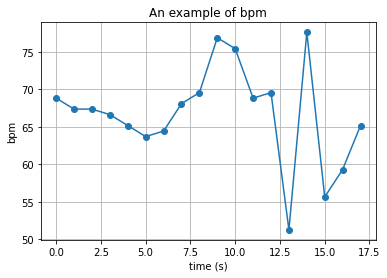

In [31]:
import matplotlib.pyplot as plt

plt.plot(timesES.squeeze(), bpmES.squeeze(), marker='o', linestyle='-')

plt.title('An example of bpm')
plt.xlabel('time (s)')
plt.ylabel('bpm')

plt.grid(True)

plt.show()